In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from imblearn.combine import SMOTEENN

In [2]:
df = pd.read_csv('data_set.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41762 entries, 0 to 41761
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VDRL_RESULT        41762 non-null  float64
 1   CONS_ALCOHOL       41762 non-null  float64
 2   RH_FACTOR          41762 non-null  float64
 3   SMOKER             41762 non-null  float64
 4   PLAN_PREGNANCY     41762 non-null  float64
 5   BLOOD_GROUP        41762 non-null  float64
 6   HAS_PREG_RISK      41762 non-null  float64
 7   TET_VACCINE        41762 non-null  float64
 8   IS_HEAD_FAMILY     41762 non-null  float64
 9   MARITAL_STATUS     41762 non-null  float64
 10  FOOD_INSECURITY    41762 non-null  float64
 11  NUM_ABORTIONS      41762 non-null  float64
 12  NUM_LIV_CHILDREN   41762 non-null  float64
 13  NUM_PREGNANCIES    41762 non-null  float64
 14  FAM_PLANNING       41762 non-null  float64
 15  TYPE_HOUSE         41762 non-null  float64
 16  HAS_FAM_INCOME     417

In [3]:
categorical_columns = [
    'VDRL_RESULT', 'CONS_ALCOHOL', 'RH_FACTOR', 'SMOKER', 'PLAN_PREGNANCY',
    'BLOOD_GROUP', 'HAS_PREG_RISK', 'TET_VACCINE', 'IS_HEAD_FAMILY', 'MARITAL_STATUS',
    'FOOD_INSECURITY', 'FAM_PLANNING', 'TYPE_HOUSE', 'HAS_FAM_INCOME', 'LEVEL_SCHOOLING',
    'CONN_SEWER_NET', 'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 'HOUSING_STATUS', 'WATER_TREATMENT'
]

In [4]:
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [5]:
numerical_columns = [
    'NUM_ABORTIONS', 'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES',
    'NUM_RES_HOUSEHOLD', 'FAM_INCOME', 'AGE'
]

  VDRL_RESULT CONS_ALCOHOL RH_FACTOR SMOKER PLAN_PREGNANCY BLOOD_GROUP  \
0         1.0          1.0       0.0    1.0            1.0         1.0   
1         1.0          1.0       0.0    1.0            1.0         0.0   
2         1.0          1.0       2.0    1.0            1.0         4.0   
3         1.0          1.0       2.0    1.0            0.0         4.0   
4         1.0          1.0       0.0    1.0            1.0         1.0   

  HAS_PREG_RISK TET_VACCINE IS_HEAD_FAMILY MARITAL_STATUS  ... HAS_FAM_INCOME  \
0           1.0         0.0            1.0            0.0  ...            0.0   
1           1.0         0.0            1.0            5.0  ...            0.0   
2           1.0         0.0            1.0            5.0  ...            1.0   
3           0.0         0.0            1.0            5.0  ...            0.0   
4           1.0         0.0            1.0            1.0  ...            1.0   

   LEVEL_SCHOOLING  CONN_SEWER_NET  NUM_RES_HOUSEHOLD HAS_FRU_TREE  

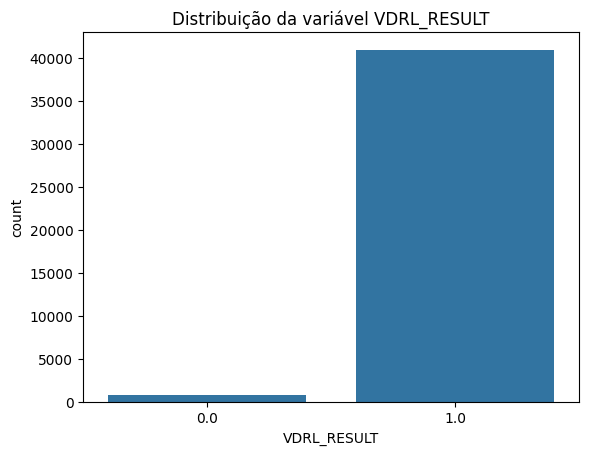

In [6]:
print(df.head())

print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

print(df.info())

print(df.describe())

print(df['VDRL_RESULT'].value_counts())

sns.countplot(x='VDRL_RESULT', data=df)
plt.title('Distribuição da variável VDRL_RESULT')
plt.show()

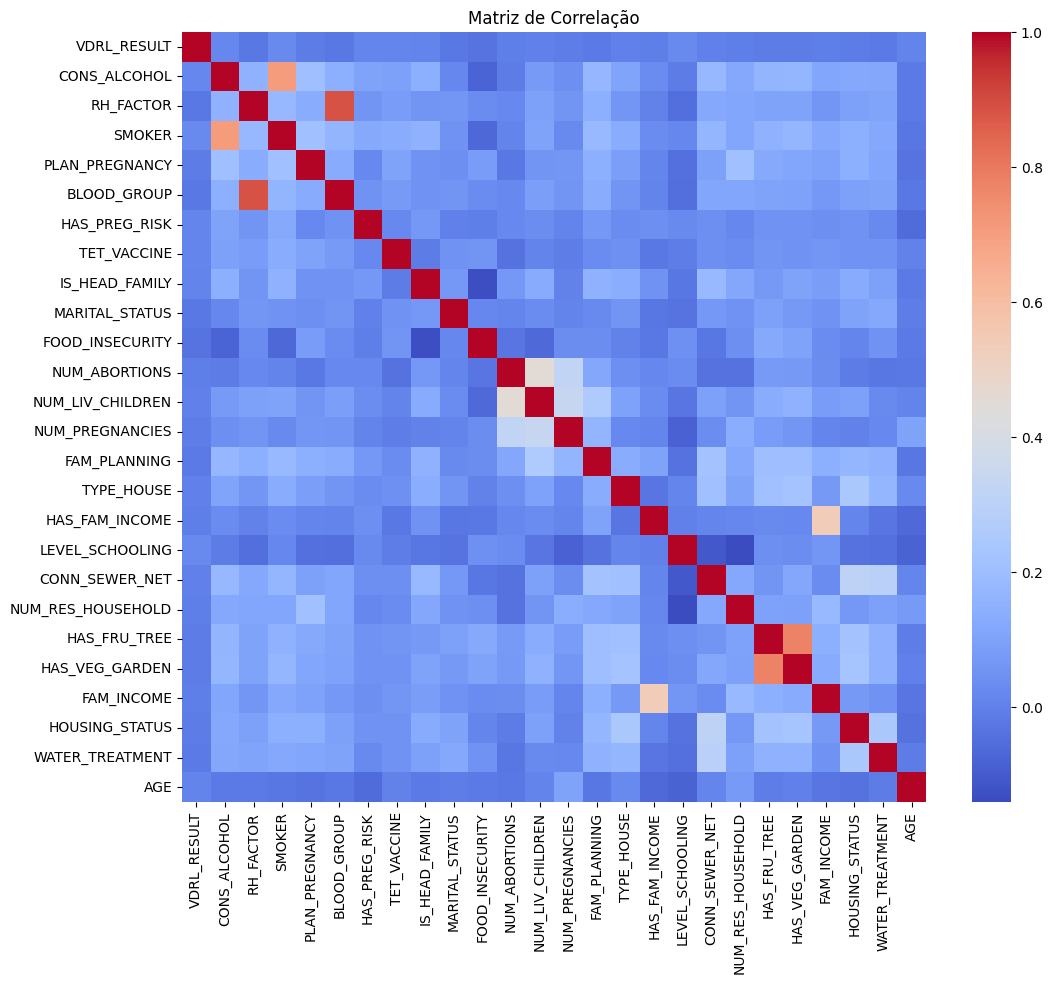

In [7]:
df_encoded = df.copy()
label_encoder = LabelEncoder()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [8]:
missing_values = df.isnull().sum()
print('Valores ausentes em cada coluna:')
print(missing_values)

Valores ausentes em cada coluna:
VDRL_RESULT          0
CONS_ALCOHOL         0
RH_FACTOR            0
SMOKER               0
PLAN_PREGNANCY       0
BLOOD_GROUP          0
HAS_PREG_RISK        0
TET_VACCINE          0
IS_HEAD_FAMILY       0
MARITAL_STATUS       0
FOOD_INSECURITY      0
NUM_ABORTIONS        0
NUM_LIV_CHILDREN     0
NUM_PREGNANCIES      0
FAM_PLANNING         0
TYPE_HOUSE           0
HAS_FAM_INCOME       0
LEVEL_SCHOOLING      0
CONN_SEWER_NET       0
NUM_RES_HOUSEHOLD    0
HAS_FRU_TREE         0
HAS_VEG_GARDEN       0
FAM_INCOME           0
HOUSING_STATUS       0
WATER_TREATMENT      0
AGE                  0
dtype: int64


In [9]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [10]:
X = df.drop('VDRL_RESULT', axis=1)
y = df['VDRL_RESULT']

print('Distribuição antes do balanceamento:')
print(y.value_counts())

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

print('Distribuição após o balanceamento:')
print(pd.Series(y_resampled).value_counts())

Distribuição antes do balanceamento:
VDRL_RESULT
1.0    40936
0.0      826
Name: count, dtype: int64


C:\Users\caiob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\caiob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Distribuição após o balanceamento:
VDRL_RESULT
0.0    40838
1.0    33337
Name: count, dtype: int64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [12]:
dt_classifier = DecisionTreeClassifier(random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results_dt = cross_val_score(dt_classifier, X_train, y_train, cv=kfold, scoring='f1_macro')

print(f'F1-Score médio (Decision Tree): {cv_results_dt.mean()}')

F1-Score médio (Decision Tree): 0.9745789846770686


Relatório de Classificação (Decision Tree):
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      8115
         1.0       0.98      0.97      0.97      6720

    accuracy                           0.98     14835
   macro avg       0.98      0.97      0.97     14835
weighted avg       0.98      0.98      0.98     14835



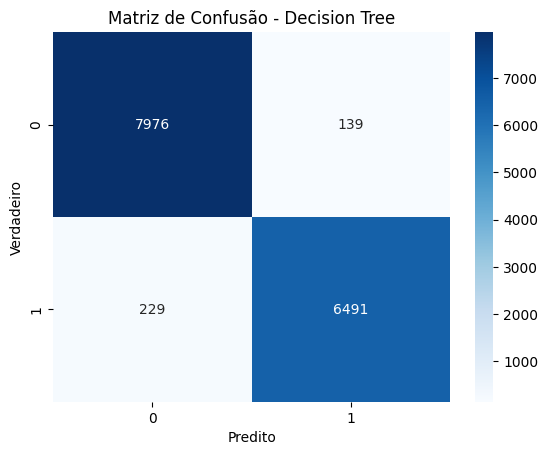

In [13]:
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

print('Relatório de Classificação (Decision Tree):')
print(classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Decision Tree')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()

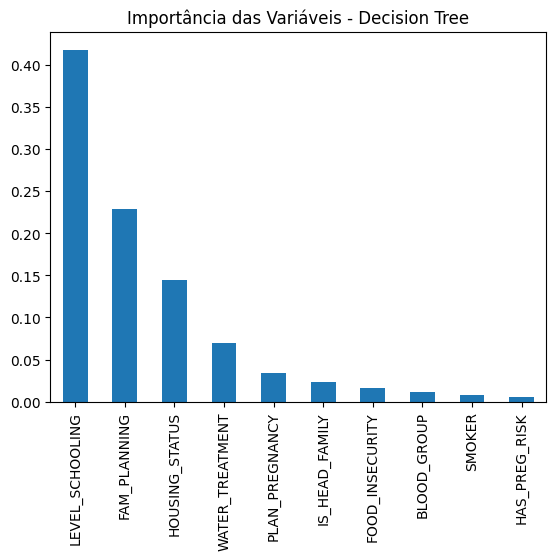

In [14]:
feature_importances_dt = pd.Series(dt_classifier.feature_importances_, index=X_train.columns)
feature_importances_dt.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Importância das Variáveis - Decision Tree')
plt.show()

In [15]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

cv_results_rf = cross_val_score(rf_classifier, X_train, y_train, cv=kfold, scoring='f1_macro')

print(f'F1-Score médio (Random Forest): {cv_results_rf.mean()}')

F1-Score médio (Random Forest): 0.9888334376821563


Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      8115
         1.0       0.98      1.00      0.99      6720

    accuracy                           0.99     14835
   macro avg       0.99      0.99      0.99     14835
weighted avg       0.99      0.99      0.99     14835



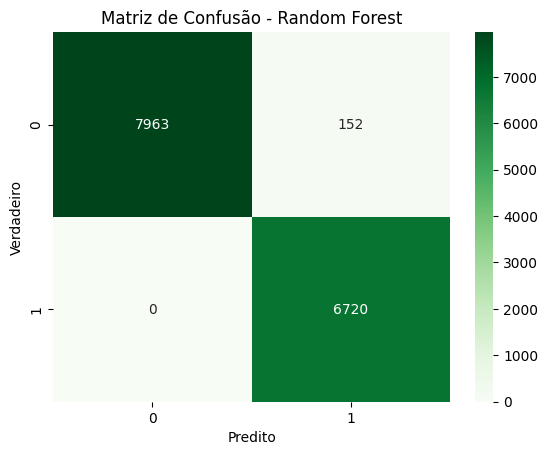

In [16]:
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print('Relatório de Classificação (Random Forest):')
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão - Random Forest')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()

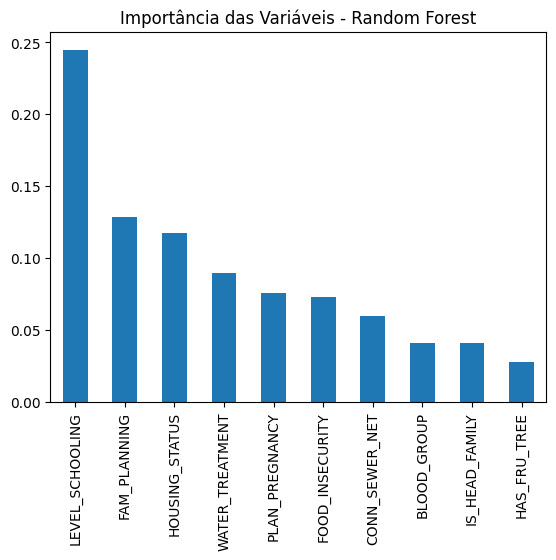

In [17]:
feature_importances_rf = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
feature_importances_rf.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Importância das Variáveis - Random Forest')
plt.show()

### Justificativa da Escolha dos Modelos

#### Árvore de Decisão: Escolhemos este modelo devido à sua interpretabilidade, permitindo visualizar as regras de decisão e entender como as variáveis influenciam o resultado.

#### Random Forest: Este modelo combina múltiplas árvores de decisão para melhorar a precisão e reduzir o overfitting, sendo robusto a outliers e variáveis irrelevantes.

In [18]:
X_reg = df.drop('AGE', axis=1)
y_reg = df['AGE']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [19]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

cv_results_reg = cross_val_score(rf_regressor, X_train_reg, y_train_reg, cv=kfold, scoring='neg_mean_absolute_error')

print(f'MAE médio (Random Forest Regressor): {-cv_results_reg.mean()}')

MAE médio (Random Forest Regressor): 2.9185317456179587


In [20]:
rf_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = rf_regressor.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
mape = np.mean(np.abs((y_test_reg - y_pred_reg) / y_test_reg)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 2.8840480209606554
RMSE: 4.158812894326695
MAPE: inf%


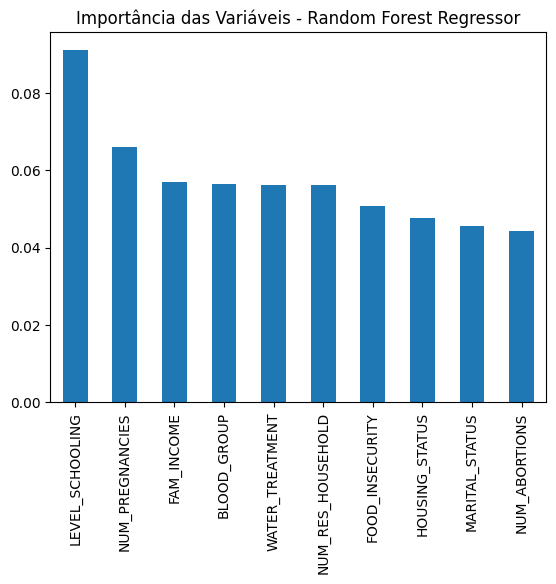

In [21]:
feature_importances_reg = pd.Series(rf_regressor.feature_importances_, index=X_train_reg.columns)
feature_importances_reg.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Importância das Variáveis - Random Forest Regressor')
plt.show()